<a href="https://colab.research.google.com/github/rptine/baseball-data-analysis/blob/master/AL_NL_Runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skl
from google.colab import files

In [0]:
# Upload the train file from your local drive
uploaded = files.upload()

Saving teams.csv to teams.csv


In [0]:
# Read the csv with the corresponding column names
df = pd.read_csv("teams.csv", delimiter=',', names=['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro'])

In [0]:
df.head

<bound method NDFrame.head of       yearID  lgID  teamID  ...  teamIDBR  teamIDlahman45  teamIDretro
0     yearID  lgID  teamID  ...  teamIDBR  teamIDlahman45  teamIDretro
1       1871   NaN     BS1  ...       BOS             BS1          BS1
2       1871   NaN     CH1  ...       CHI             CH1          CH1
3       1871   NaN     CL1  ...       CLE             CL1          CL1
4       1871   NaN     FW1  ...       KEK             FW1          FW1
...      ...   ...     ...  ...       ...             ...          ...
2921    2019    NL     SLN  ...       STL             SLN          SLN
2922    2019    AL     TBA  ...       TBR             TBA          TBA
2923    2019    AL     TEX  ...       TEX             TEX          TEX
2924    2019    AL     TOR  ...       TOR             TOR          TOR
2925    2019    NL     WAS  ...       WSN             MON          WAS

[2926 rows x 48 columns]>

In [0]:
df.sample(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
376,1900,NL,BRO,LAD,NaN,1,141,NaN,82,54,NaN,NaN,Y,NaN,816,4860,1423,199,81,26,421,269,274,NaN,81,NaN,722,530,3.89,104,8,4,3677,1370,30,405,300,303,102,0.948,Brooklyn Superbas,Washington Park III,183000,106,104,BRO,BRO,BRO
520,1909,NL,NY1,SFG,NaN,3,158,77,92,61,NaN,NaN,N,N,624,5218,1327,173,68,26,530,487,240,NaN,52,NaN,547,364,2.27,102,17,15,4322,1248,28,397,735,307,99,0.954,New York Giants,Polo Grounds III,783700,102,98,NYG,NY1,NY1
1914,1984,NL,SFN,SFG,W,6,162,81,66,96,N,NaN,N,N,682,5650,1499,229,26,112,528,980,126,76,17,44,807,713,4.39,9,7,38,4383,1589,125,549,854,173,134,0.973,San Francisco Giants,Candlestick Park,1001545,97,98,SFG,SFN,SFN
2755,2014,AL,DET,DET,C,1,162,81,90,72,Y,N,N,N,757,5630,1557,325,26,155,443,1144,106,41,44,61,705,648,4.01,5,8,41,4362,1475,127,462,1244,101,153,0.983,Detroit Tigers,Comerica Park,2917209,105,104,DET,DET,DET
2767,2014,NL,PIT,PIT,C,2,162,81,88,74,N,Y,N,N,682,5536,1436,275,30,156,520,1244,104,47,78,35,631,562,3.47,2,7,48,4369,1341,128,499,1228,109,148,0.983,Pittsburgh Pirates,PNC Park,2442564,98,97,PIT,PIT,PIT
2640,2010,NL,LAN,LAD,W,4,162,81,80,82,N,N,N,N,667,5426,1368,270,29,120,533,1184,92,50,46,50,692,643,4.01,4,16,41,4325,1323,134,539,1274,98,124,0.984,Los Angeles Dodgers,Dodger Stadium,3562320,95,95,LAD,LAN,LAN
1547,1970,NL,CHN,CHC,E,2,162,80,84,78,N,NaN,N,N,806,5491,1424,228,44,179,607,844,39,16,20,36,679,599,3.76,59,9,25,4305,1402,143,475,1000,137,146,0.978,Chicago Cubs,Wrigley Field,1642705,111,110,CHC,CHN,CHN
2210,1996,NL,ATL,ATL,E,1,162,81,96,66,Y,N,Y,N,773,5614,1514,264,28,197,530,1032,83,43,27,50,648,575,3.52,14,9,46,4407,1372,120,451,1245,130,143,0.980,Atlanta Braves,Atlanta-Fulton County Stadium,2901242,106,104,ATL,ATL,ATL
2843,2017,AL,CLE,CLE,C,1,162,81,102,60,Y,N,N,N,818,5511,1449,333,29,212,604,1153,88,23,50,45,564,529,3.30,7,19,37,4322,1267,163,406,1614,76,167,0.987,Cleveland Indians,Progressive Field,2048138,106,104,CLE,CLE,CLE
2587,2008,NL,PIT,PIT,C,6,162,81,67,95,N,N,N,N,735,5628,1454,314,21,153,474,1039,57,19,59,51,884,822,5.08,3,7,34,4365,1631,176,657,963,107,179,0.983,Pittsburgh Pirates,PNC Park,1609076,96,98,PIT,PIT,PIT


In [0]:
df.shape

(2926, 48)

# Extract AL and NL data, and break down by year

In [0]:
# Create two dataframes - one for AL and another for NL
dfAL = df.loc[df['lgID'] == 'AL']
dfNL = df.loc[df['lgID'] == 'NL']

# Extract relevent years (1973-2019); 1973 was the first year of the DH
years = []
for year in range(1973,2020):
  years.append(year)

# Declare empty lists to store the average Runs/Game for each year, rounded to the nearest hundredth
runsAL = []
runsNL = []


for year in years:
  dfALYear = dfAL.loc[dfAL['yearID']==str(year)]
  dfNLYear = dfNL.loc[dfNL['yearID']==str(year)]

  teamCountAL=len(dfALYear)
  teamCountNL=len(dfNLYear)

  RYearAL = dfALYear.R.values.astype(int)
  RYearNL = dfNLYear.R.values.astype(int)

  # Find number of games played for current year
  GYear = dfNLYear.G.values.astype(int)[0]

  AvgRYearAL = (RYearAL.sum())/teamCountAL
  AvgRYearNL = (RYearNL.sum())/teamCountNL

  # Round to the nearest hundredth
  AvgRYearAL = AvgRYearAL/GYear
  AvgRYearNL = AvgRYearNL/GYear

  runsAL.append(AvgRYearAL)
  runsNL.append(AvgRYearNL)


# Calculate average difference in runs
leagueDiff = list()
for i in range(len(runsAL)):
  runsDiff = runsAL[i]-runsNL[i]
  
  leagueDiff.append(runsDiff)
averageLeagueDiff = sum(leagueDiff)/len(leagueDiff)
print("Average run difference: ", averageLeagueDiff)

# Round the runs per year
for i in range(len(runsAL)):
  runsAL[i] = round(runsAL[i],2)
  runsNL[i] = round(runsNL[i],2)
  
  leagueDiff.append(runsDiff)
averageLeagueDiff = sum(leagueDiff)/len(leagueDiff)
print("Runs/Game AL: ", runsAL)
print("Runs/Game NL: ", runsNL)


Average run difference:  0.2849911227712856
Runs/Game AL:  [4.28, 4.08, 4.29, 3.99, 4.52, 4.19, 4.7, 4.53, 4.08, 4.48, 4.49, 4.42, 4.55, 4.64, 4.93, 4.4, 4.32, 4.3, 4.49, 4.32, 4.71, 5.22, 5.07, 5.38, 4.92, 5.01, 5.17, 5.29, 4.86, 4.8, 4.86, 5.01, 4.76, 4.97, 4.9, 4.78, 4.82, 4.45, 4.46, 4.45, 4.33, 4.18, 4.38, 4.51, 4.71, 4.53, 4.88]
Runs/Game NL:  [4.15, 4.13, 4.15, 3.98, 4.4, 3.98, 4.26, 4.06, 3.92, 4.09, 4.11, 4.06, 4.06, 4.19, 4.54, 3.92, 3.97, 4.2, 4.09, 3.88, 4.49, 4.65, 4.63, 4.68, 4.6, 4.6, 5.0, 5.01, 4.7, 4.44, 4.61, 4.64, 4.45, 4.76, 4.71, 4.53, 4.43, 4.33, 4.12, 4.22, 4.0, 3.95, 4.11, 4.43, 4.58, 4.37, 4.78]


# Plot AL and NL Data

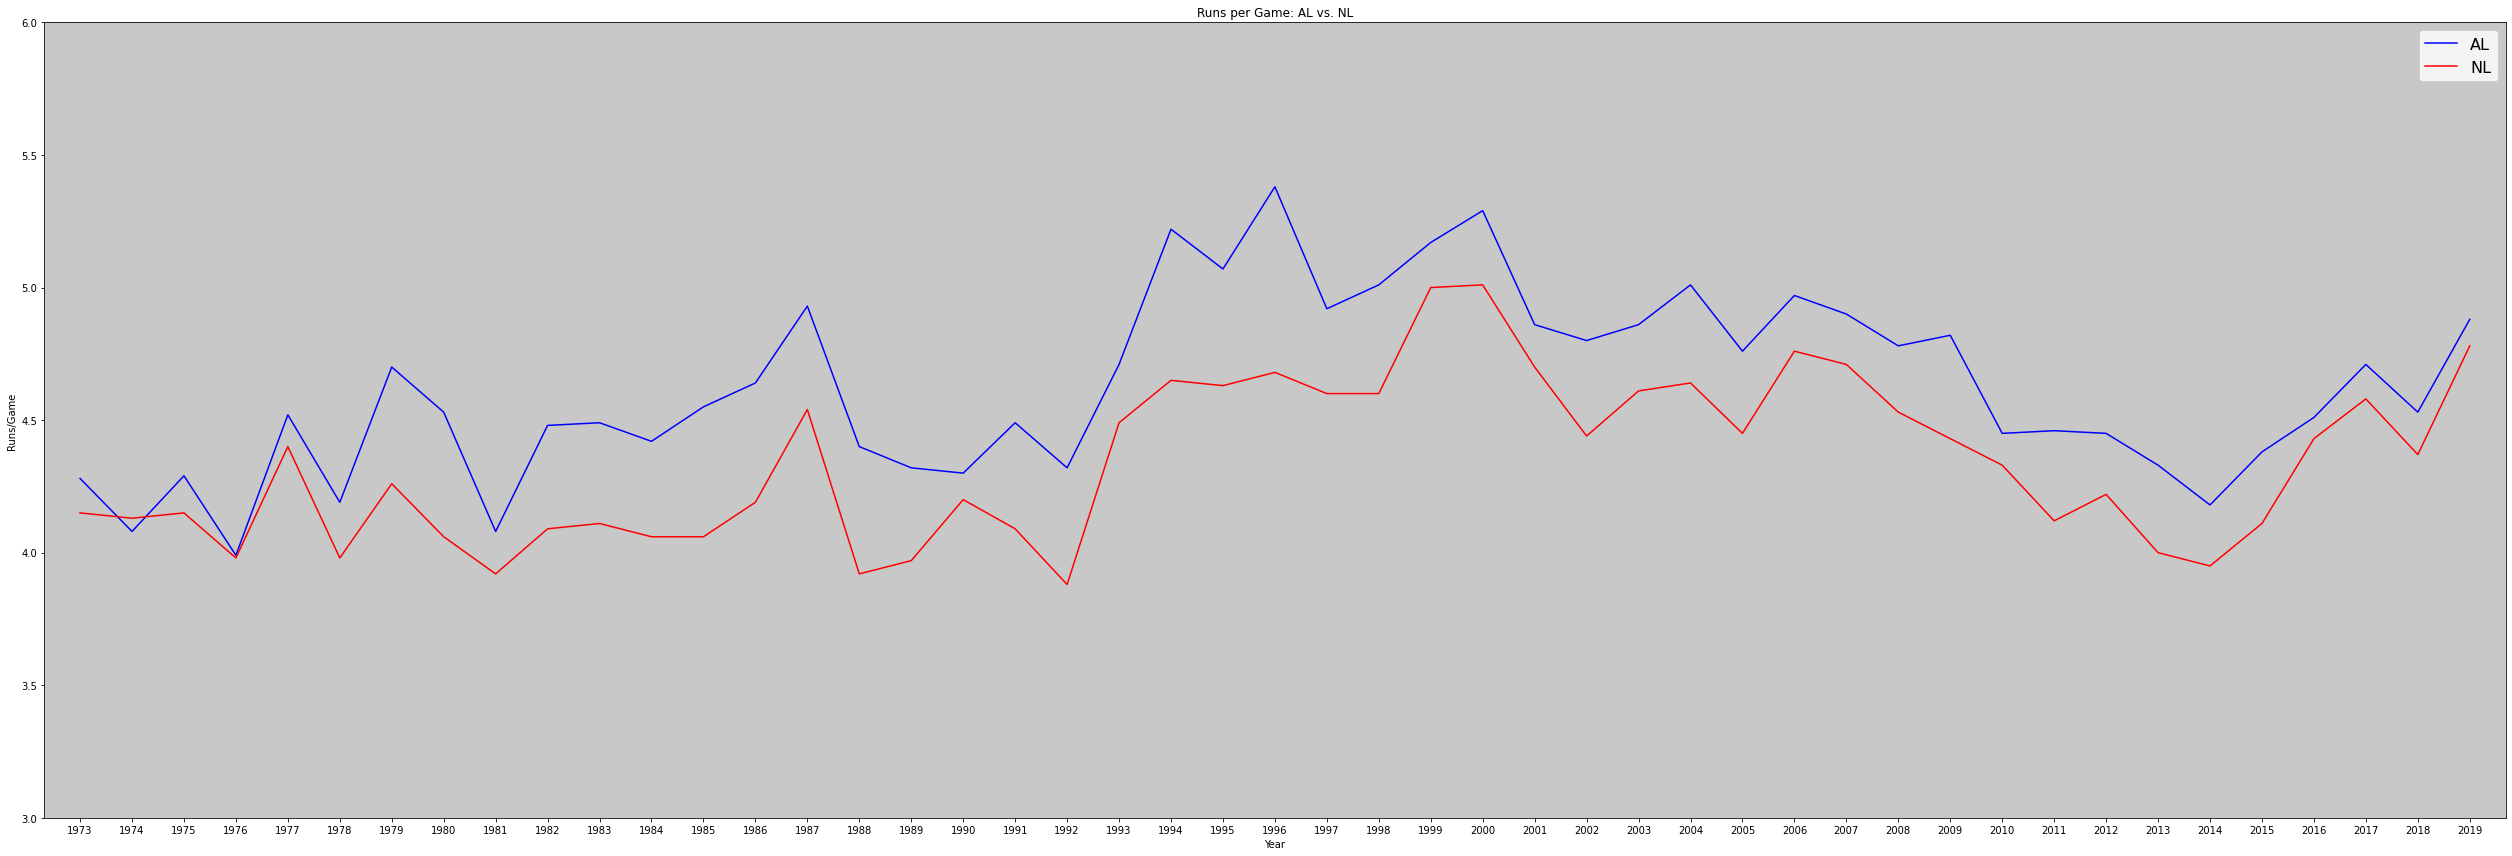

In [0]:
plt.rcParams["figure.figsize"] = (35,12)

fig, ax = plt.subplots()

# Plot runsAL and runsNL as line graphs
plt.plot(years, runsAL, color='blue', label="AL")
plt.plot(years, runsNL, color='red', label="NL")
plt.margins(.015)

# Set titles and lables
plt.xlabel('Year')
ax.set_xticks(years)
ax.set_yticks(np.arange(3,6.5, step=0.5))
ax.set_ylim(ymin=3)
plt.ylabel('Runs/Game')
plt.title('Runs per Game: AL vs. NL')
plt.legend(prop={'size': 16})

# Set text sizes
plt.rc('font', size=10)          # size of labels on the bars
plt.rc('axes', titlesize=24)     # fontsize of the figure title
plt.rc('axes', labelsize=18)    # fontsize of the x and y axis titles
plt.rc('xtick', labelsize=12)    # fontsize of the x-axis tick labels
plt.rc('ytick', labelsize=12)    # fontsize y-axis tick labels


ax.set_facecolor("#B0B0B0B0")

# Set figure to occupy the entire plot
fig.tight_layout()

# Download the plot to local machine
plt.savefig("RunsALNLLine.png")
files.download("RunsALNLLine.png") 


plt.show()

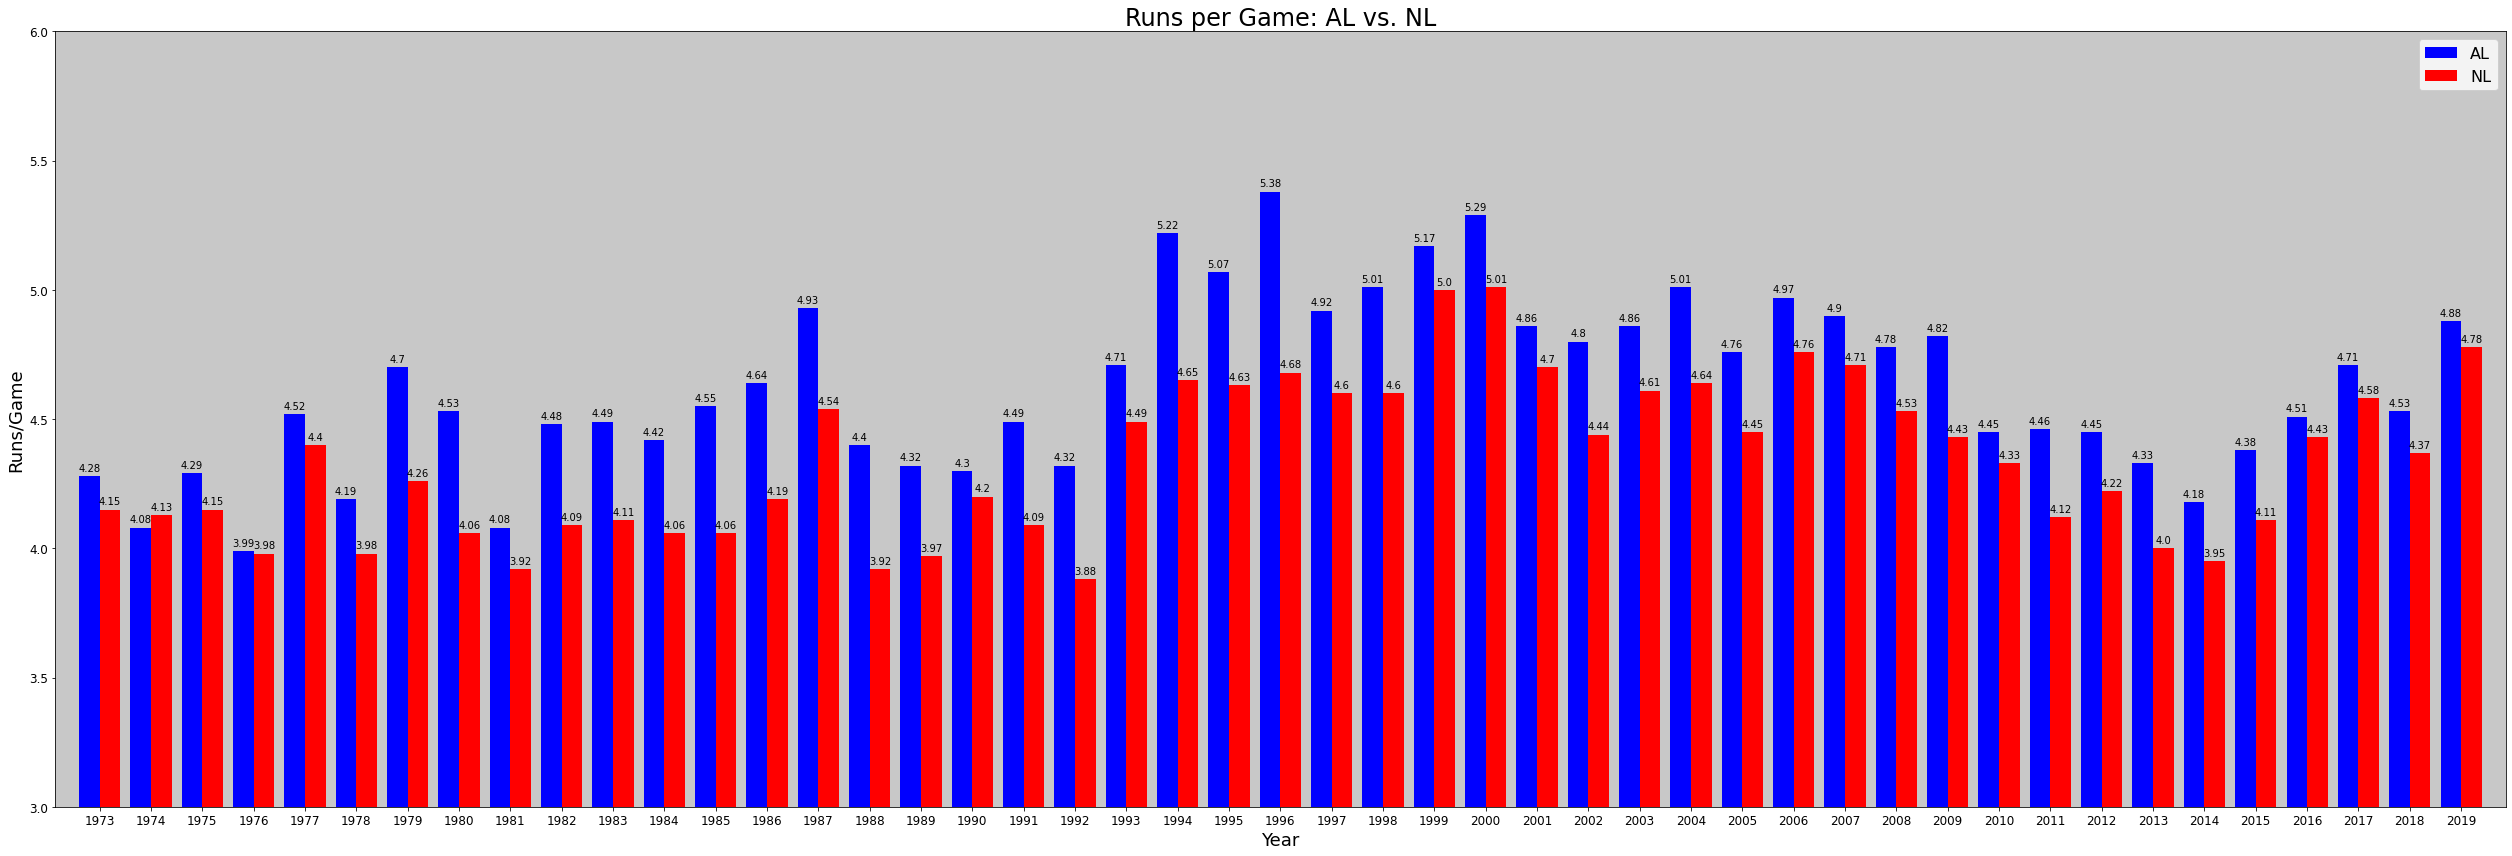

In [0]:
plt.rcParams["figure.figsize"] = (35,12)
fig, ax = plt.subplots()

labels = years # labels are the years [1973,...,2019]
x = np.arange(len(labels))
width = 0.4  # the width of the bars
plt.margins(.01)



# Set BarContainers
barAL = ax.bar(x - width/2, runsAL, width, label='AL', color='blue')
barNL = ax.bar(x + width/2, runsNL, width, label='NL', color='red')

# Set text sizes
plt.rc('font', size=10)          # size of labels on the bars
plt.rc('axes', titlesize=24)     # fontsize of the figure title
plt.rc('axes', labelsize=18)    # fontsize of the x and y axis titles
plt.rc('xtick', labelsize=12)    # fontsize of the x-axis tick labels
plt.rc('ytick', labelsize=12)    # fontsize y-axis tick labels


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs/Game')
ax.set_xlabel('Year')
ax.set_title('Runs per Game: AL vs. NL')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(3,6.5, step=0.5))
ax.set_ylim(ymin=3)
ax.legend(prop={'size': 16})


def setBarLabel(bars):
    """Attach a text label above each bar in bars, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_facecolor("#B0B0B0B0")

setBarLabel(barAL)
setBarLabel(barNL)

# Set figure to occupy the entire plot
fig.tight_layout()

plt.savefig("RunsALNL.png")
files.download("RunsALNL.png") 